# <center>SCL - Laboratoire 1</center>

In [1]:
from scipy.optimize import curve_fit
import matplotlib.image as mpimg
import matplotlib.pyplot as mpl
from scipy.io import loadmat
from pathlib import Path
from math import radians
import numpy as np

## Reading .mat files

In [2]:
path = Path.cwd() / "Data"              # .mat files location
mat = loadmat(path / "labo1.mat")       # Reading matlab workspace
figpath = Path.cwd() / "Graphs"         # Graph save location

## Extracting required data from mat files

In [3]:
for i in list(mat.keys())[0:3]:
    del mat[i]

## Sinus function for curvefitting

In [4]:
def sinus(t, a, w, phi, b):
    return a * np.sin(w*t + phi) + b

## Signal plot function

In [5]:
def signal(t, v_in, v_out, popt_y, freq):
    mpl.figure(figsize=(10,7))

    mpl.plot(t, v_out, linewidth=2, color='r', alpha=0.75, label="Tension de sortie")
    mpl.plot(t, sinus(t, *popt_y), linewidth=2, color='b', alpha=0.75, label="Fitted curve")
    mpl.plot(t, v_in, linewidth=2, color='g', alpha=0.75, label="Tension d'entrée")

    mpl.xlabel("Temps [s]")
    mpl.ylabel("Tension [V]")
    mpl.grid(linestyle="dotted", linewidth=1)
    mpl.title("Fréquence angulaire d'entrée de " + str(freq) + " Rads/s")
    mpl.legend(loc="lower right")
    mpl.savefig(figpath / data + ".pdf", bbox_inches="tight", dpi=1500)
    #mpl.savefig(figpath / data + ".png", bbox_inches="tight", dpi=1500)
    mpl.clf()

## Nyquist plot function

In [6]:
def Nyquist(ampl_y, ampl_u, phase):
    for i, phi in enumerate(phase):
        phi = radians(phi)
        x = ampl_y[i]/ampl_u * np.exp(phi*1j)
        Re.append(np.real(x))
        Im.append(np.imag(x))

    fig1, ax1 = mpl.subplots()
    ax1.axhline(y=0, color='k')
    ax1.axvline(x=0, color='k')
    ax1.plot(Re, Im, color="r")
    ax1.minorticks_on()
    ax1.grid(which='major', linestyle='-', linewidth='0.5', color='k')
    ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='k')
    ax1.set_title('Lieu de Nyquist')
    ax1.set_xlabel('Re')
    ax1.set_ylabel('Im')

    fig1.savefig('Nyquist.png', facecolor='white', dpi=1500)
    fig1.savefig(figpath / 'Nyquist.pdf', bbox_inches="tight", dpi=1500)
    mpl.clf()

## Bode diagrams plot function

In [7]:
def Bode(ampl_y, ampl_u, phase, gain, freqs):
    fig2, (ax1, ax2) = mpl.subplots(2, 1)
    ax1.axhline(y=0, color='k')
    ax1.semilogx(freqs, phase, color="g")
    ax1.minorticks_on()
    ax1.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax1.set_title('Diagrammes de Bode')
    ax1.set_xlabel('\u03C9 [rad/s]')
    ax1.set_ylabel('Phase [\u00B0]')

    ax2.axhline(y=0, color='k')
    ax2.semilogx(freqs, gain, color="g")
    ax2.minorticks_on()
    ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax2.set_xlabel('\u03C9 [rad/s]')
    ax2.set_ylabel("Gain [dB]")
    fig2.savefig(figpath / 'Bode.pdf', bbox_inches="tight", dpi=1500)
    fig2.savefig('Bode.png', facecolor='white', dpi=1500)
    mpl.clf()

## Black graph plot function

In [8]:
def Black(phase, gain):
    fig3, ax3 = mpl.subplots()
    ax3.axhline(y=0, color='k')
    ax3.axvline(x=0, color='k')
    ax3.plot(phase, gain, color="b")
    ax3.minorticks_on()
    ax3.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    ax3.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax3.set_title('Lieu de Black')
    ax3.set_xlabel('Phase [\u00B0]')
    ax3.set_ylabel("Gain [dB]")
    fig3.savefig(figpath / 'Black.pdf', bbox_inches="tight", dpi=1500)
    fig3.savefig('Black.png', facecolor='white', dpi=1500)
    mpl.clf()

## Initial variables

In [9]:
freqs = np.array([0.3, 0.4, 0.6, 0.8, 1.4, 1.9, 2.6, 3.6, 4.8, 6.5,
                    8.8, 12.0, 16.0, 22.0, 30.0, 40.0, 55.0, 75.0])
ampl_u = 0.5
ampl_y, phase = [], []
Re, Im = [], []

## Data processing

In [10]:
for i, data in enumerate(mat):
    t = mat[data][1:,0]
    v_in = mat[data][1:,2]
    v_out = mat[data][1:,3]
    popt_y, _ = curve_fit(sinus, t, v_out, p0=[5, freqs[i], 0, 1])
    ampl_y.append(popt_y[0])
    phase.append(popt_y[2])
    #signal(t, v_in, v_out, popt_y, freqs[i])

## Making sure every sinus has a positive gain

In [11]:
for i, amp in enumerate(ampl_y):
    if amp < 0:
        phase[i] = phase[i] - np.pi
        ampl_y[i] = -amp

## Setting important variables: gain and phase

In [12]:
ampl_y = np.array(ampl_y)
phase = (np.array(phase))*180/(2*np.pi)
gain = 20 * np.log10(ampl_y / ampl_u)

## Generating graphs

In [13]:
Nyquist(ampl_y, ampl_u, phase)
Bode(ampl_y, ampl_u, phase, gain, freqs)
Black(phase, gain)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Displaying graphs

(-0.5, 8999.5, 5999.5, -0.5)

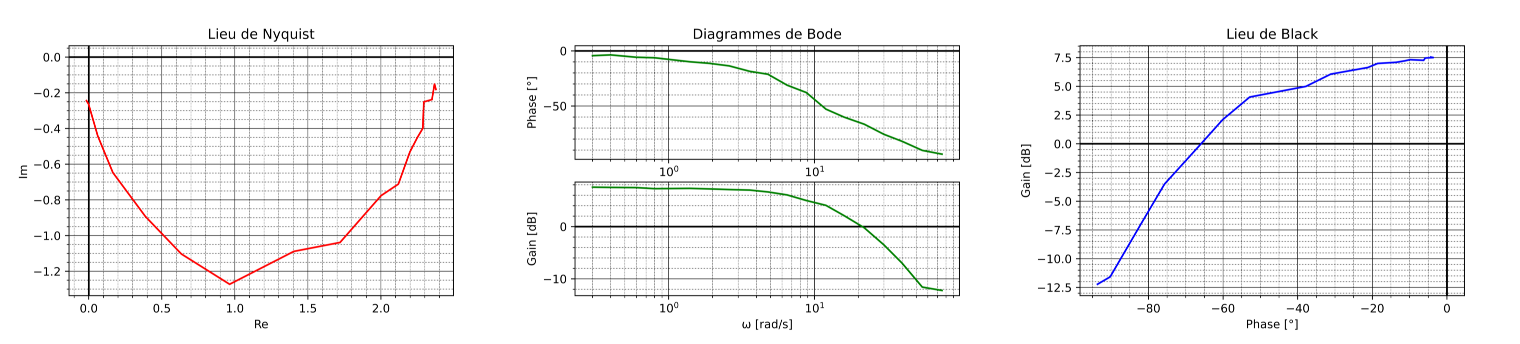

In [14]:
Nypath = mpimg.imread('Nyquist.png')
Bodepath = mpimg.imread('Bode.png')
Blackpath = mpimg.imread('Black.png')

fig4, ax = mpl.subplots(1,3, figsize=(21,200), constrained_layout=True)
ax[0].imshow(Nypath)
ax[0].axis('off')
ax[1].imshow(Bodepath)
ax[1].axis('off')
ax[2].imshow(Blackpath)
ax[2].axis('off')

## Export variables to csv

In [15]:
np.savetxt("magnitude.csv", gain, delimiter=",")
np.savetxt("phase.csv", phase, delimiter=",")
np.savetxt("real.csv", Re, delimiter=",")
np.savetxt("w.csv", freqs, delimiter=",")
np.savetxt("imag.csv", Im, delimiter=",")